# Conducting AB Experiment

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/MLUL2/refs/heads/main/cf/ctr.csv")

In [3]:
# Ensure the data is numeric
df['control'] = pd.to_numeric(df['control'], errors='coerce')
df['treatment'] = pd.to_numeric(df['treatment'], errors='coerce')

In [4]:
# Drop any rows with NaN just in case
df_clean = df.dropna()

In [5]:
# Recalculate test statistics
t_stat, p_value = stats.ttest_ind(df_clean['control'], df_clean['treatment'])
mean_diff = df_clean['treatment'].mean() - df_clean['control'].mean()
pooled_std = np.sqrt((df_clean['control'].std()**2 + df_clean['treatment'].std()**2) / 2)
cohen_d = mean_diff / pooled_std

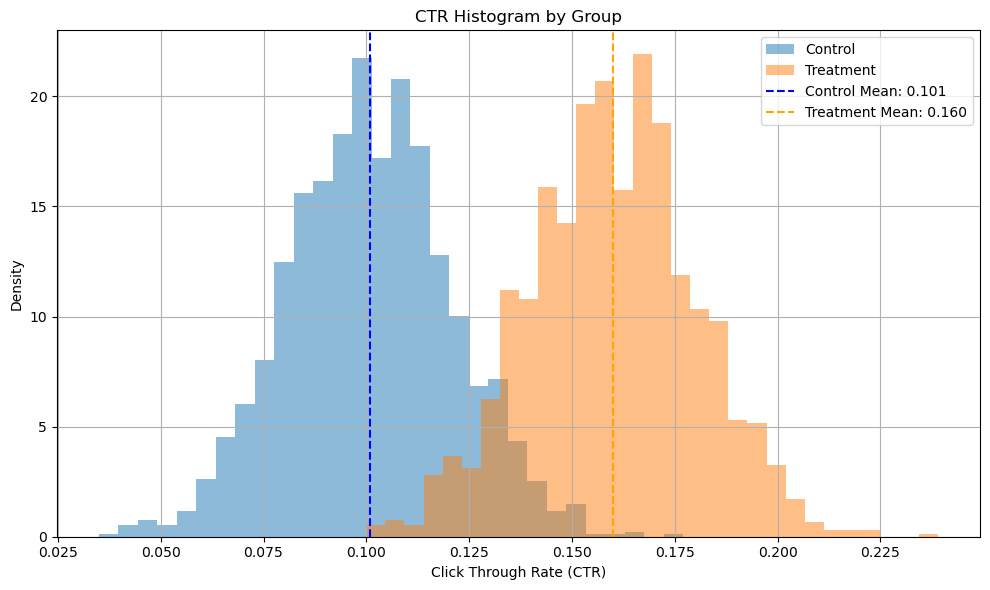

In [6]:
# Histogram plot
plt.figure(figsize=(10, 6))
plt.hist(df_clean['control'], bins=30, alpha=0.5, label='Control', density=True)
plt.hist(df_clean['treatment'], bins=30, alpha=0.5, label='Treatment', density=True)
plt.axvline(df_clean['control'].mean(), color='blue', linestyle='--', label=f"Control Mean: {df_clean['control'].mean():.3f}")
plt.axvline(df_clean['treatment'].mean(), color='orange', linestyle='--', label=f"Treatment Mean: {df_clean['treatment'].mean():.3f}")
plt.title("CTR Histogram by Group")
plt.xlabel("Click Through Rate (CTR)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Prepare test results summary
test_summary = pd.DataFrame({
    'Metric': ['Control Mean', 'Treatment Mean', 'Mean Difference', 't-Statistic', 'p-Value', "Cohen's d"],
    'Value': [df_clean['control'].mean(), df_clean['treatment'].mean(), mean_diff, t_stat, p_value, cohen_d]
})

In [8]:
test_summary

,Metric,Value
0,Control Mean,0.100908
1,Treatment Mean,0.159866
2,Mean Difference,0.058958
3,t-Statistic,-93.498573
4,p-Value,0.000000
5,Cohen's d,2.956685
